IPR on one of the edge site: 0.07580004586690223


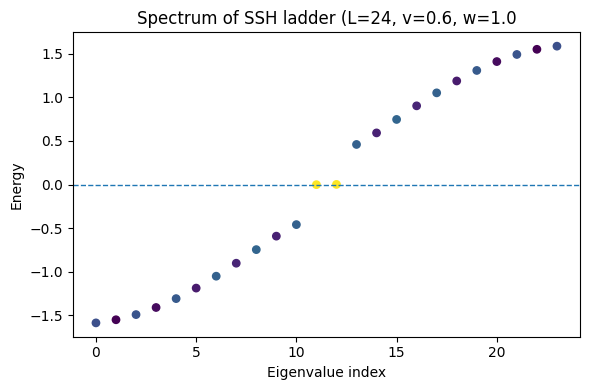

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def build_real_space_H(L, v, w):
    H = np.zeros((L, L), dtype=complex)
    def add_hop(i, j, amp):
        # print(amp, i, j)
        H[i, j] -= amp
        H[j, i] -= np.conjugate(amp)

    # v and w terms
    for j in range(L-1):
        if j % 2 == 0:
            add_hop(j, j+1, v)
        else:
            add_hop(j, j+1, w) 

    # add_hop(0, L - 1, t)

    return H


def edge_weight(evecs, L):
    edge_sites = np.array([0, L//2 - 1, L//2, L - 1])
    probs = np.abs(evecs[edge_sites, :])**2
    return probs.sum(axis=0)

L, v, w = 24, 0.6, 1.
H = build_real_space_H(L, v, w)
E, V = np.linalg.eigh(H)

ew = edge_weight(V, L)

IPR = np.sum(np.abs(V[L//2,:])**4, axis=0)
print("IPR on one of the edge site:", IPR)

plt.figure(figsize=(6,4))
plt.scatter(np.arange(L), E, c=ew, s=28)
#plt.colorbar()
plt.axhline(0, ls='--', lw=1)
plt.title("Spectrum of SSH ladder" + f" (L={L}, v={v}, w={w}")
plt.xlabel("Eigenvalue index")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

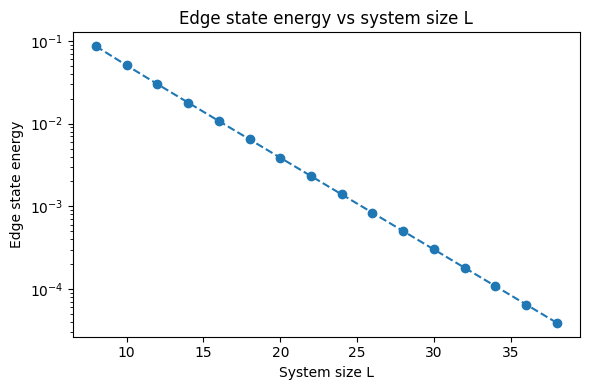

In [2]:
Ls = np.arange(8, 40, 2)
edge_energies = []
for L in Ls:
    H = build_real_space_H(L, v, w)
    E, V = np.linalg.eigh(H)
    edge_energies.append(E[L//2])

plt.figure(figsize=(6,4))
plt.plot(Ls, edge_energies, 'o--')
plt.yscale('log')
plt.title("Edge state energy vs system size L")
plt.xlabel("System size L")
plt.ylabel("Edge state energy")
plt.tight_layout()
plt.show()

In [3]:
xi, _ = -np.polyfit(Ls, np.log10(np.abs(edge_energies)), 1)
xi

0.11123311030899466

In [4]:
xi_analytic = np.log10(w/v) / 2
xi_analytic

0.1109243748081782

### Edge modes Overlap

In [50]:
def edge_overlap_and_delta(L, v, w):
    H = build_real_space_H(L, v, w)
    E, V = np.linalg.eigh(H)

    psi0, psi1 = V[:, L//2 - 1], V[:, L//2]

    # build approximate left/right localized states
    psi_L = (psi0 + psi1) / np.sqrt(2)
    psi_R = (psi0 - psi1) / np.sqrt(2)

    Hpsi_L = H @ psi_L
    Hpsi_R = H @ psi_R

    E_L = np.vdot(psi_L, Hpsi_L)   # ⟨L|H|L⟩
    # E_R = np.vdot(psi_R, Hpsi_R)   # ⟨R|H|R⟩
    delta = np.vdot(psi_L, Hpsi_R)  # ⟨L|H|R⟩

    return delta


In [51]:
edge_overlap_and_delta(10, v, w)

(-0.050663536838415735+0j)

In [52]:
v, w = 0.6, 1.0
L_list = np.arange(8, 42, 2)

overlap_list = []

for L in L_list:
    delta = edge_overlap_and_delta(L, v, w)
    overlap_list.append(delta)

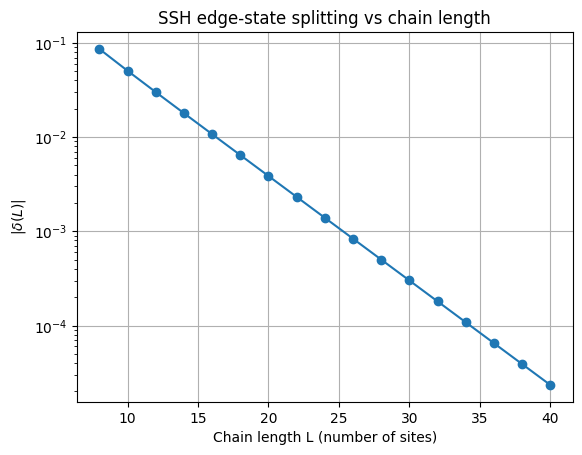

In [53]:
# semilog plot: |delta| vs L
plt.figure()
plt.semilogy(L_list, np.abs(overlap_list), 'o-')
plt.xlabel("Chain length L (number of sites)")
plt.ylabel(r"$|\delta(L)|$")
plt.title(r"SSH edge-state splitting vs chain length")
plt.grid(True)
plt.show()

In [12]:
# maybe ignore very small L where finite-size effects are strong
mask = L_list >= 16
L_fit = L_list[mask]
log_delta_fit = log_delta[mask]

# linear fit: log|delta| = a * L + b
a, b = np.polyfit(L_fit, log_delta_fit, 1)

xi = -1.0 / a   # since a ≈ -1/xi
print("Estimated coherence length xi ≈", 1/xi)


Estimated coherence length xi ≈ 0.25541860497907765
